In [1]:
import numpy as np
from skimage.feature import greycomatrix, greycoprops
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from skimage.util import img_as_float

import load_read_name_extractor as rne
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import get_lodging_scores 
from skimage import io, color
import cv2  # importing cv
import imutils
import glob
from matplotlib.pyplot import imshow # import imshow directly since we will use it a lot
from skimage.util import img_as_ubyte, img_as_float # Convert image between interval ~(0,255) and ~(0,1)

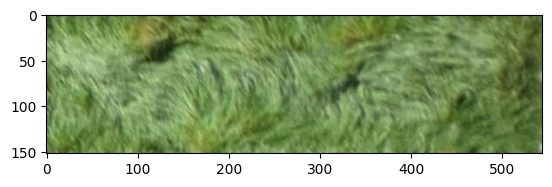

In [2]:
img, names = rne.load_name_and_img("cropped/*.jpeg")
imshow(img[0])

In [3]:
# Convert to grayscale
gray_image = []
for i in range(len(img)):
    n = color.rgb2gray(img[i])
    n = img_as_ubyte(n)
    gray_image.append(n)



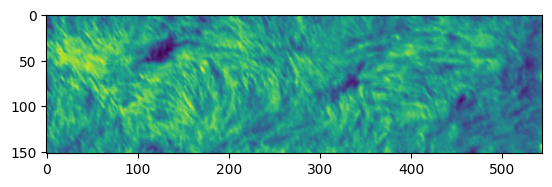

In [4]:
gray_image = np.array(gray_image)

imshow(gray_image[0])

In [5]:

# Compute Haralick features
def harlick(gray_image):
    distances = [1, 2, 3]
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
    glcm = greycomatrix(gray_image, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)
    contrast = greycoprops(glcm, 'contrast')
    dissimilarity = greycoprops(glcm, 'dissimilarity')
    homogeneity = greycoprops(glcm, 'homogeneity')
    energy = greycoprops(glcm, 'energy')
    correlation = greycoprops(glcm, 'correlation')
    ASM = greycoprops(glcm, 'ASM')
    features = np.concatenate((contrast.flatten(), dissimilarity.flatten(), homogeneity.flatten(), energy.flatten(), correlation.flatten(), ASM.flatten()))
    return features
# Use features for classification, segmentation, or retrieval

harlick_features = []
for i in range(len(gray_image)):
    harlick_features.append(harlick(gray_image[i]))

harlick_features = np.array(harlick_features)
rne.save_in_txt(harlick_features, filename="Features/harlick_emil")
rne.save_in_txt(names, "Features/harlick_emil_names")




c:\Users\Bruger\miniconda3\lib\site-packages\skimage\feature\__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
c:\Users\Bruger\miniconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\Bruger\miniconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\Bruger\miniconda3\lib\site-packages\skimage\feature\__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
c:\Users\Bruger\miniconda3

In [7]:
harlick_features[0].shape

(72,)